In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[1])
circuit.reset(qreg_q[2])

# Alice sends Bob a qubit state 
# Uses entanglement
# Uses local operations and classical communication

# intialize the qubit to teleport
circuit.t(qreg_q[0])
circuit.h(qreg_q[0])

# distribute an entangled pair
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])

circuit.barrier(qreg_q[0])  
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[2])

# process Alice's qubits
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])

# measure Alice's qubits and send results to Bob
circuit.measure(qreg_q[0], creg_c[0]) 
circuit.measure(qreg_q[1], creg_c[1])

# process Bob's qubit until Bob has Alice's original qubit state
circuit.z(qreg_q[2]).c_if(creg_c, 1)
circuit.x(qreg_q[2]).c_if(creg_c, 1)

print(circuit)

          ┌───┐┌───┐ ░      ┌───┐┌─┐              
q_0: ─|0>─┤ T ├┤ H ├─░───■──┤ H ├┤M├──────────────
          ├───┤└───┘ ░ ┌─┴─┐└┬─┬┘└╥┘              
q_1: ─|0>─┤ H ├──■───░─┤ X ├─┤M├──╫───────────────
          └───┘┌─┴─┐ ░ └───┘ └╥┘  ║  ┌───┐  ┌───┐ 
q_2: ─|0>──────┤ X ├─░────────╫───╫──┤ Z ├──┤ X ├─
               └───┘ ░        ║   ║  └─╥─┘  └─╥─┘ 
                              ║   ║ ┌──╨──┐┌──╨──┐
c: 2/═════════════════════════╩═══╩═╡ = 1 ╞╡ = 1 ╞
                              1   0 └─────┘└─────┘


In [2]:
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator') # the device to run on

In [3]:
from qiskit import transpile

# execute the quantum circuit
result = backend.run(transpile(circuit, backend), shots=10000).result()
counts  = result.get_counts(circuit)
print(counts)

{'00': 2549, '01': 2537, '10': 2512, '11': 2402}


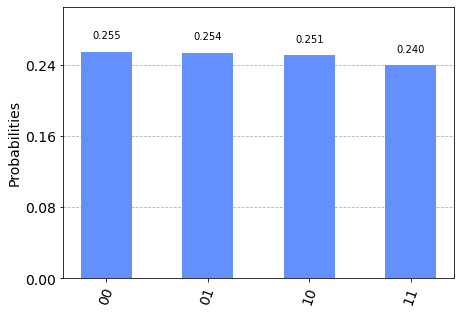

In [4]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)